# **Project - Linear Regression**

**Data Preparation**

* Data Loading: Load the dataset ( Real-estate-dataset.csv )
* Data Cleaning: Handle missing values, remove or correct erroneous data, and deal with any outliers that might skew the results.
* Feature Transformation: Convert categorical data into numerical formats using techniques like one-hot encoding or label encoding.
* Feature Selection: Choose relevant features for the prediction model. Exclude the target variable (for example, 'price') from the features.
* Data Splitting: Split the dataset into training and testing sets, typically using a ratio like 80:20 or 70:30 for train:test.

**Model Training and Evaluation**

* Model Selection: Choose the Linear Regression model for the analysis.
* Feature Scaling: Apply scaling to the features using standardization or normalization, as Linear Regression can be sensitive to the scale of input features.
* Model Training: Train the Linear Regression model using the training data.
* Model Evaluation: Assess the performance of the model using metrics appropriate for regression analysis.
* The evaluation metrics used in the code include R-squared value, mean squared error, mean absolute error, and root mean squared error.

In [1]:
import pandas as pd

In [2]:

# Load the dataset
real_estate_data = pd.read_csv('/content/Real-estate-dataset.csv')

In [3]:
# Import the required libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the required libraries for machine learning
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

# Function for data preprocessing
def data_preprocessing(data):

    # One-hot encoding for categorical variables
    data_encoded = pd.get_dummies(data, drop_first=True)

    # Splitting the data into features and target variable
    X = data_encoded.drop('price', axis=1)
    y = data_encoded['price']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    return X_train, X_test, y_train, y_test
# Function to plot actual vs predicted prices
def plot_actual_vs_predicted(model, X_test, y_test):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title('Actual vs Predicted Prices')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--') # Reference line
    plt.show()



# Function for training the model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model


# Function to plot the learning curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_mean_squared_error', shuffle=True)

    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Error')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.plot(train_sizes, test_mean, label='Validation Error')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
    plt.xlabel("Training Set Size")
    plt.ylabel("MSE")
    plt.title("Linear Regression - Learning Curve")
    plt.legend()
    plt.show()



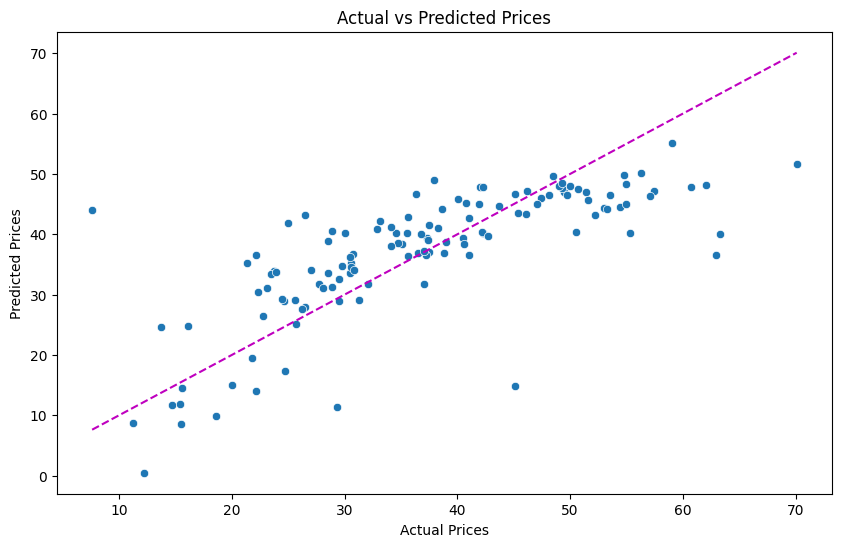

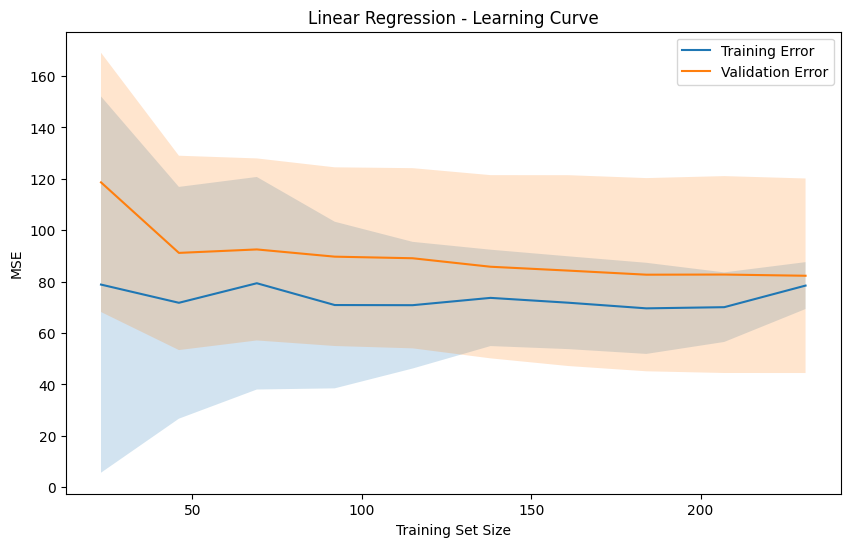

In [4]:

# Example usage of the functions
file_path = 'Real-estate-dataset.csv'

# Reading the data
data = pd.read_csv(file_path)
#perform_eda(data)

X_train, X_test, y_train, y_test = data_preprocessing(data)
model = train_model(X_train, y_train)
plot_actual_vs_predicted(model, X_test, y_test)
plot_learning_curve(model, X_train, y_train)